### PROBLEM STATEMENT: We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

### Step 1:Import the libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
  

In [2]:
### Step 2:Load the file

## Load and review data

In [3]:
car_df = pd.read_csv("auto-mpg.csv")  


In [4]:
car_df.shape

(398, 9)

In [5]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
255,25.1,4,140.0,88,2720,15.4,78,1,ford fairmont (man)
39,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham
371,29.0,4,135.0,84,2525,16.0,82,1,dodge aries se
352,29.9,4,98.0,65,2380,20.7,81,1,ford escort 2h
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba
292,18.5,8,360.0,150,3940,13.0,79,1,chrysler lebaron town @ country (sw)
143,26.0,4,97.0,78,2300,14.5,74,2,opel manta
203,29.5,4,97.0,71,1825,12.2,76,2,volkswagen rabbit
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro


In [6]:
#dropping/ignoring car_name 
car_df = car_df.drop('car name', axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
366,17.6,6,225.0,85,3465,16.6,81,america
6,14.0,8,454.0,220,4354,9.0,70,america
318,29.8,4,134.0,90,2711,15.5,80,asia
181,33.0,4,91.0,53,1795,17.5,75,asia
179,22.0,4,121.0,98,2945,14.5,75,europe
312,37.2,4,86.0,65,2019,16.4,80,asia
231,15.5,8,400.0,190,4325,12.2,77,america
308,33.5,4,151.0,90,2556,13.2,79,america
18,27.0,4,97.0,88,2130,14.5,70,asia
151,31.0,4,79.0,67,2000,16.0,74,europe


In [8]:
### One hot encoding
car_df = pd.get_dummies(car_df, columns=['origin']) ### one hot encoding
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
175,29.0,4,90.0,70,1937,14.0,75,0,0,1
108,20.0,4,97.0,88,2279,19.0,73,0,1,0
337,32.4,4,107.0,72,2290,17.0,80,0,1,0
267,27.5,4,134.0,95,2560,14.2,78,0,1,0
25,10.0,8,360.0,215,4615,14.0,70,1,0,0
186,27.0,4,101.0,83,2202,15.3,76,0,0,1
59,23.0,4,97.0,54,2254,23.5,72,0,0,1
230,15.5,8,350.0,170,4165,11.4,77,1,0,0
283,20.2,6,232.0,90,3265,18.2,79,1,0,0
178,23.0,4,120.0,88,2957,17.0,75,0,0,1


In [9]:
car_df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [10]:
car_df.dtypes


mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

## Dealing with Missing Values

In [11]:
#A quick summary of the data columns
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [12]:
car_df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [13]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [14]:
# hp is missing cause it does not seem to be recognized as a numerical column!
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [15]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [16]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [17]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [18]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively


medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float


In [19]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

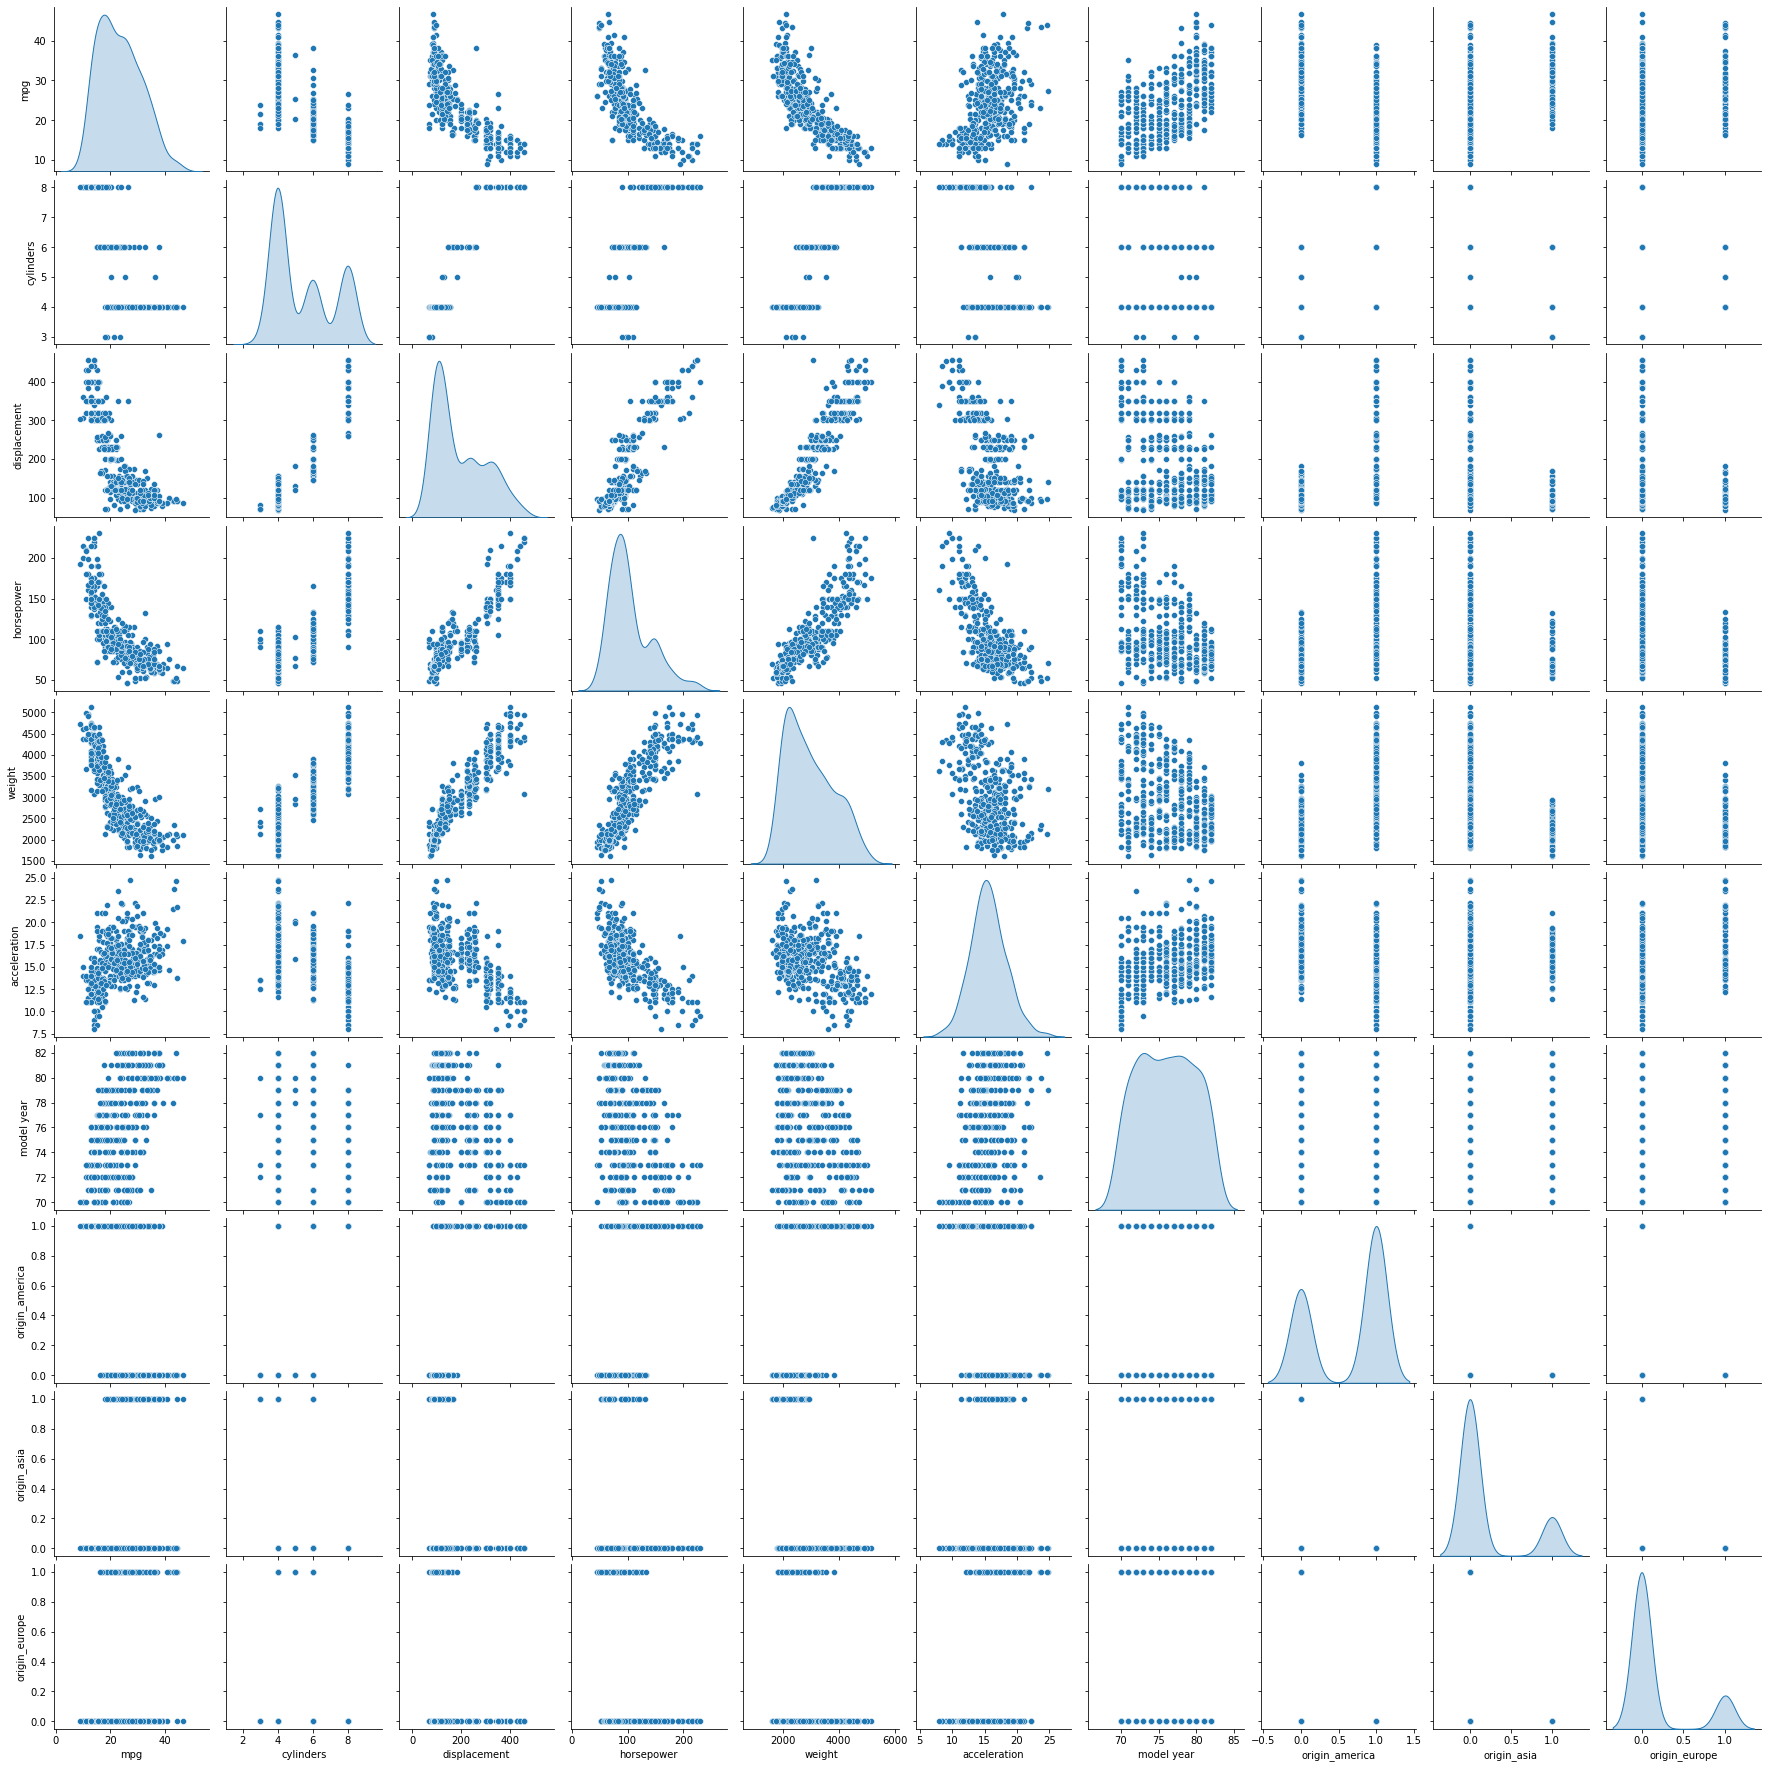

In [20]:
sns.pairplot(car_df,diag_kind="kde")

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


In [21]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## Split Data

In [22]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [23]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Fit Linear Model

In [24]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

Here are the coefficients for each variable and the intercept

The score (R^2) for in-sample and out of sample

In [25]:
reg_model.score(X_train, y_train)

0.8141025501610559

In [26]:
#out of sample score (R^2)

reg_model.score(X_test, y_test)


0.8433135132808831

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.8995492105437926


In [44]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.861349075272287


### Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)

In [31]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [32]:
model.score(X_train,y_train)

0.8252713272277856

In [33]:
model.score(X_test,y_test)

0.7892652919447365

In [34]:
from sklearn.ensemble import BaggingRegressor

In [35]:
model1=BaggingRegressor(n_estimators=14,base_estimator=model)

In [36]:
model1.fit(X_train,y_train)

C:\Users\Premalatha\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                      max_depth=3),
                 n_estimators=14)

In [37]:
model1.score(X_train,y_train)

0.8887824169116916

In [38]:
model1.score(X_test,y_test)

0.8586245540555533